# Tri par Fusion

[John von Neumann](https://fr.wikipedia.org/wiki/John_von_Neumann), 1945

## Principe

On peut facilement fusionner deux listes triées en une seule en en extrayant itérativement le plus petit élément. Celui-ci est forcément aussi le plus petit de l'une des deux listes à fusionner. 

Ce procédé est appelé fusion et est au cœur de l'algorithme de tri par fusion récursif.

* Si le tableau n'a qu'un élément, il est déjà trié.


* Sinon, séparer le tableau en deux parties à peu près égales.


* Trier récursivement les deux parties avec l'algorithme du tri fusion.


* Fusionner les deux parties triées en un seul tableau trié.

Ce tri a été illustré par [Saturday Morning Breakfast Cereal](http://www.smbc-comics.com/?id=1989)

## Fusion 

###  Entrées: 

les sous-tableaux `T[permier:limite]` et `T[limite:dernier]`, supposés triés.

### Sortie:

le tableau `T[premier:dernier]` est trié

### Algorithme:

* copier les deux sous-tableaux dans des tableaux annexes T1 et T2


* boucler par positions croissantes dans T, et y copier <br><BR>
   * `si` T1 est vide, min(T2) <br><br> 
   * `sinon, si` T2 est vide, min(T1) <br><br> 
   * `sinon`, le plus petit de min(T1),min(T2) <br><br> 
   * et supprimer l'élément copié de la liste T1 ou T2 

Les listes `Tk` (`T1` et `T2`) étant triées, <br>

* `ik` est l'indice du premier élément pas encore fusionné <br><br> 
* `min(Tk)` est `Tk[ik]` <br><br> 
* `ik += 1` supprime ce minimum de `Tk`.

In [1]:
import include.helpers as asd1

In [2]:
def fusion(T, premier, limite, dernier):     
    asd1.affiche_entree_fusion(T,premier, limite, dernier)

    T1 = T[premier:limite].copy()
    T2 = T[limite:dernier].copy()
    i1 = i2 = 0
    
    for i in range(premier,dernier):
        if i2 < len(T2) and ( i1 >= len(T1) or 
                             T2[i2] < T1[i1]):
            T[i] = T2[i2]; i2 += 1
        else:
            T[i] = T1[i1]; i1 += 1

    asd1.affiche_sortie_fusion(T,premier,limite,dernier)

In [3]:
T = [ 3, 4, 5, 1, 2, 6 ]; fusion( T, 0, 3, 6 )

[3, 4, 5][1, 2, 6]  F(0,3,6)
[1, 2, 3, 4, 5, 6]


## Récursion

### Entrée: 

le tableau `T[premier:dernier]` dans un ordre quelconque

### Sortie: 

`T[premier:dernier]` est trié

### Cas trivial:

`T` a 0 ou 1 élément, ne rien faire

### Cas général: 

diviser `T` en deux, les trier récursivement, puis les fusionner



In [4]:
def recursion(T,premier,dernier):  
    asd1.affiche_entree_tri_fusion(T,premier, dernier)
    
    N = dernier - premier
    if N >= 2:
            
        milieu = premier + N//2
        recursion(T,premier,milieu)
        recursion(T,milieu,dernier)
        fusion(T,premier,milieu,dernier)

In [5]:
def tri(T):
    recursion(T,0,len(T))

In [6]:
T = [5, 4, 3, 2, 6, 7, 1]; tri(T)

[5, 4, 3, 2, 6, 7, 1]  R(0,7)
[5, 4, 3]............    R(0,3)
[5]..................      R(0,1)
...[4, 3]............    R(1,3)
...[4]...............      R(1,2)
......[3]............      R(2,3)
...[4][3]............    F(1,2,3)
...[3, 4]............
[5][3, 4]............    F(0,1,3)
[3, 4, 5]............
.........[2, 6, 7, 1]  R(3,7)
.........[2, 6]......    R(3,5)
.........[2].........      R(3,4)
............[6]......      R(4,5)
.........[2][6]......    F(3,4,5)
.........[2, 6]......
...............[7, 1]    R(5,7)
...............[7]...      R(5,6)
..................[1]      R(6,7)
...............[7][1]    F(5,6,7)
...............[1, 7]
.........[2, 6][1, 7]  F(3,5,7)
.........[1, 2, 6, 7]
[3, 4, 5][1, 2, 6, 7]  F(0,3,7)
[1, 2, 3, 4, 5, 6, 7]


## En résumé

Le tri par fusion est mis en oeuvre de manière récursive. Il commence par faire deux appels récursifs sur les moitiés gauche et droite du tableau, puis les fusionne. 

*Note: La fonction de comparaison est passée en paramètre générique pour permettre l'analyse de la stabilité, et les opérations de comparaison et d'assignation dans le tableau sont sous-traitées à include.helpers pour permettre de les compter lors de l'analyse de la complexité*

In [7]:
def fusionner(T, premier, milieu, dernier, 
              comparer = asd1.plus_petit):
    T1 = asd1.copier_tableau(T[premier:milieu]); i1 = 0
    T2 = asd1.copier_tableau(T[milieu:dernier]); i2 = 0
    for i in range(premier,dernier):
        if i2 < len(T2) and ( i1 >= len(T1) or 
                             comparer(T2[i2],T1[i1])):
            T[i] = asd1.assigner(T2[i2]); i2 += 1;
        else:
            T[i] = asd1.assigner(T1[i1]); i1 += 1;  

In [8]:
def tri_fusion_recursif(T,premier,dernier,
                        comparer = asd1.plus_petit):
    if dernier - premier >= 2:            
        milieu = premier + (dernier - premier) // 2        
        tri_fusion_recursif(T, premier, milieu, comparer)
        tri_fusion_recursif(T, milieu, dernier, comparer)
        fusionner(T,premier,milieu,dernier,comparer)

In [9]:
def tri_fusion(T, comparer = asd1.plus_petit ):
    tri_fusion_recursif(T,0,len(T),comparer)

## Visualisation

Trions un tableau de 64 entiers aléatoires entre 0 et 100. Nous affichons l'état du tableau aprés les étapes de fusion qui fusionnent 16 éléments ou plus. 

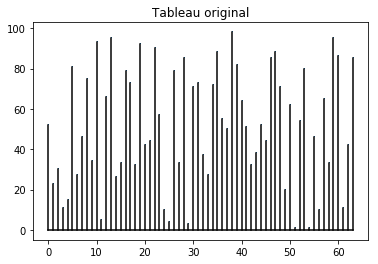

In [10]:
import numpy as np
T = np.random.randint(0,100,64)
asd1.afficheIteration(T,'Tableau original')  

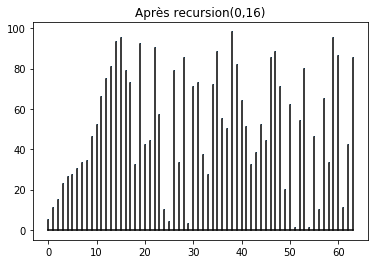

In [11]:
tri_fusion_recursif(T,0,16)
asd1.afficheIteration(T,'Après recursion(0,16)')  

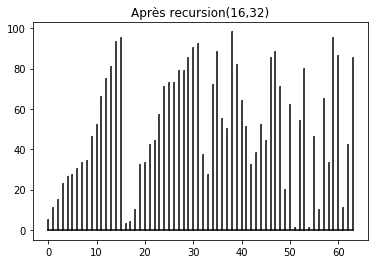

In [12]:
tri_fusion_recursif(T,16,32)
asd1.afficheIteration(T,'Après recursion(16,32)') 

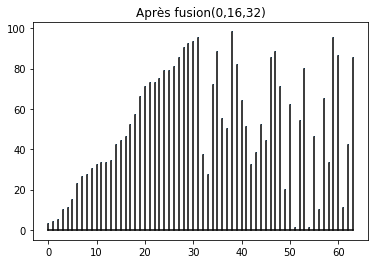

In [13]:
fusionner(T,0,16,32)
asd1.afficheIteration(T,'Après fusion(0,16,32)') 

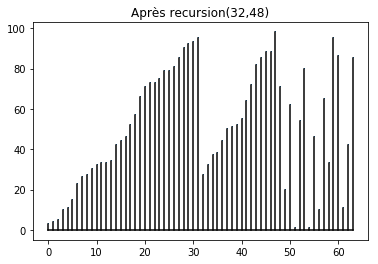

In [14]:
tri_fusion_recursif(T,32,48)
asd1.afficheIteration(T,'Après recursion(32,48)')  

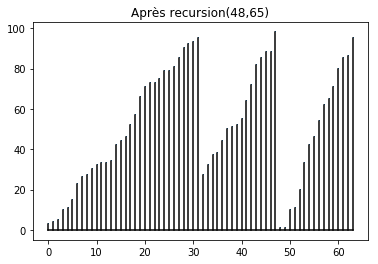

In [15]:
tri_fusion_recursif(T,48,64)
asd1.afficheIteration(T,'Après recursion(48,65)')  

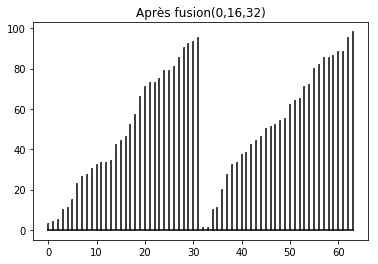

In [16]:
fusionner(T,32,48,64)
asd1.afficheIteration(T,'Après fusion(0,16,32)')

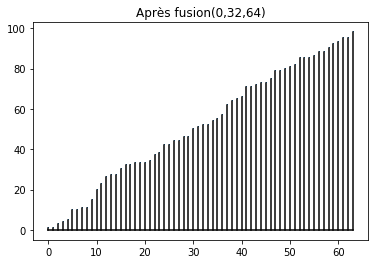

In [17]:
fusionner(T,0,32,64)
asd1.afficheIteration(T,'Après fusion(0,32,64)')

## Stabilité

Le tri fusion est **stable**. 

La ligne critique est le test `T2[i2] < T1[i1]`. 

En cas d'égalité entre l'élément le plus petit de T1 ou de T2, il faut d'abord copier dans T celui de T1. En effet, il vient de la section `[premier:milieu]` qui est antérieure à la section `[milieu:dernier]`

Vérifions le en triant par parties fractionnaires puis par parties entières. 


Le tri est stable


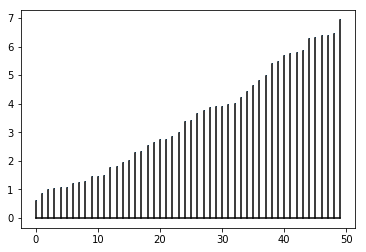

In [18]:
asd1.test_stabilite(tri_fusion)

## Complexité

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement. 

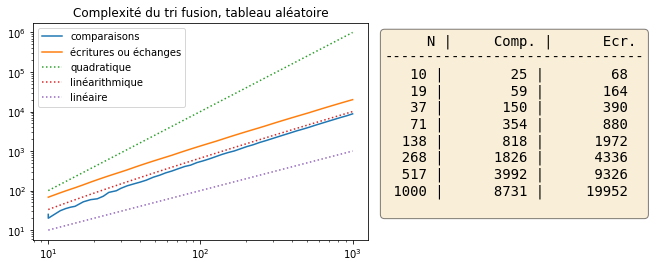

In [19]:
asd1.evalue_complexite(tri_fusion, asd1.tableau_aleatoire, 
                       "tri fusion, tableau aléatoire")

La complexité du tri est **linéarithmique** en $\Theta(n\log(n))$. 

* chaque appel récursif divise par deux la taille du tableau à traiter. La **profondeur de récursion** est donc de $\Theta(\log_2 n)$.


* Pour une profondeur de récursion $k$ donnée, chaque élément est impliqué dans une et une seule des $2^k$ fusions. 


* L'ensemble des fusions à une profondeur de récursion donnée a donc une complexité $\Theta(n)$
   
   
* La complexité pour toutes les profondeurs de récursion est donc $\Theta(n\log(n))$ 

Par ailleurs, le nombre d'opérations est indépendant du contenu de l'entrée. Il n'y a pas de meilleur ou de pire cas.

### Réduire le nombre d'écritures

S'il est efficace pour le nombre de comparaisons, ce tri effectue un très grand nombre d'écritures dans le tableau. A chaque fusion, chaque élément est en effet copié 2 fois.

* du tableau T vers un des tableaux annexes T1 ou T2


* d'un tableau annexe vers T

Il est possible d'éviter la première de ces copies en utilisant toujours le même tableau annexe de la taille du tableau T original, et en échangeant le rôle des deux tableaux à chaque niveau de récursion

La fonction de fusion prend 2 tableaux en paramètres: `IN` et `OUT`

In [20]:
def fusionner2(OUT, IN, premier, milieu, dernier, 
              comparer = asd1.plus_petit):
    
        i1 = premier; i2 = milieu
        for i in range(premier,dernier):
            if i2 < dernier and ( 
                i1 >= milieu or comparer(IN[i2],IN[i1]) ):
                OUT[i] = asd1.assigner(IN[i2]); i2 += 1;
            else:
                OUT[i] = asd1.assigner(IN[i1]); i1 += 1;

La fonction récursive prend les même deux tableaux en paramètre. Les appels récursifs en échangent le rôle. 

In [21]:
def tri_fusion_recursif2(OUT,IN,premier,dernier,comparer = asd1.plus_petit): 
    if dernier - premier >= 2:          
        milieu = premier + int((dernier - premier)/2)
        tri_fusion_recursif2(IN,OUT, premier, milieu, comparer)
        tri_fusion_recursif2(IN,OUT, milieu, dernier, comparer)
        fusionner2(OUT,IN,premier,milieu,dernier,comparer)

La fonction d'appel originale crée le tableau annexe en copiant le tableau original.

In [22]:
def tri_fusion2(T, comparer = asd1.plus_petit ):
    TMP = asd1.copier_tableau(T)
    tri_fusion_recursif2(T,TMP,0,len(T),comparer)

Toutes les copies T → T1 et T → T2 sont remplacées par une seule copie de T → TMP. On passe donc d'environ $2 \cdot n \cdot \log n$ écritures à seulement $n \cdot \log n + n$.

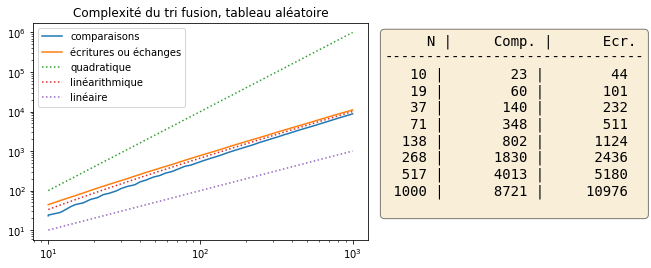

In [23]:
asd1.evalue_complexite(tri_fusion2, asd1.tableau_aleatoire, 
                       "tri fusion, tableau aléatoire")

## Complexité spatiale

Les deux versions de l'algorithme présentées demandent de copier tous les éléments dans un tableau annexe. La mémoire additionelle utilisée est donc $\Theta(n)$. 


Si ce n'est pas acceptable, il existe des alternatives

* [Dudzinki][1] (1981) propose propose une fonction de fusion en place RECMERGE de complexité temporelle $\Theta(n \log n)$, ce qui donne une complexité $\Theta(n \log^2 n)$ pour le tri fusion. Elle est utilisée par `std::stable_sort` en C++ quand la mémoire est limitée. 


* [Katajainen][2] (1996) propose un tri fusion entièrement en place (complexité spatiale $\Theta(1)$) mais pas stable


* [Geffert][3] (2000) montre qu'un tri fusion en place stable est possible avec une complexité temporelle en $\Theta(n \log n)$ et spatiale en $\Theta(1)$, mais il est trop lent en pratique


* [Kim et Kutzner][4] (2008) proposent une variante de [tri par bloc][5] qui est stable, a une complexité temporelle $\Theta(n \log n)$ et spatiale presque constante $\Theta(\log^2 n)$

[1]: https://doi.org/10.1016/0020-0190(81)90065-X
[2]: http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.22.8523
[3]: https://doi.org/10.1016/S0304-3975(98)00162-5
[4]: http://itbe.hanyang.ac.kr/ak/papers/tamc2008.pdf
[5]: https://en.wikipedia.org/wiki/Block_sort

## Conclusion


Le tri fusion 

* est **stable** <BR><BR>

* a une **complexité temporelle** linéarithmique, en $\Theta(n \log n)$ <BR><BR>

* a une **complexité spatiale** linéaire, en $\Theta(n)$ <BR><BR>

* a des **variantes** moins gourmandes en mémoire mais plus difficiles à coder. 

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>